In [124]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../aeroComputing/lib/")
import pyvot

In [125]:
# set up ARs to test and known vals
ARs = np.arange(1.5, 4.75, 0.25)
Mi = 2.8
pi = 130000
Ti = 320
y = 1.4

# find known inlet AR
ARi = (1/Mi)*((1+(y-1)/2*Mi**2)/((y+1)/2))**((y+1)/(2*(y-1)))

In [126]:
# calculate each area ratio for M1
ARM1s = [ar*ARi for ar in ARs]

# use newton raphson to find roots of equation
def findRoots(arm1, rootlevel):
    def f(x): return (1/x)*((1+(y-1)/2*x**2)/((y+1)/2))**((y+1)/(2*(y-1))) - arm1
    def df(x): return ((x**2-1)*(2**((1-3*y)/(2-2*y)))*((0.5*(x**2)*(y-1)+1)/(y+1))**((y+1)/(2*(y-1))))/((x**2)*((x**2)*(y-1)+2))
    # get range of roots - only supersonic answers
    a, b = pyvot.rootsearch(f, rootlevel, 10, 0.1)
    # get soltn
    return pyvot.newtonRaphson(f, df, a, b)

# get supersonic solution for each M1
M1s = [findRoots(arm1, 1) for arm1 in ARM1s]

In [127]:
# calc each M2
M2s = [np.sqrt((m1**2+2/(y-1))/((2*y)/(y-1)*m1**2 - 1)) for m1 in M1s]

# get poi
poi = pi*(1+(y-1)/2*Mi**2)**(y/(y-1))

# get each p1
p1s = [poi/(1+(y-1)/2*m1**2)**(y/(y-1)) for m1 in M1s]

# get each p2
p2s = [p1*(1+y*m1**2)/(1+y*m2**2) for p1, m1, m2 in zip(p1s, M1s, M2s)]

In [128]:
# find known inlet AR
ARis = [(1/m2)*((1+(y-1)/2*m2**2)/((y+1)/2))**((y+1)/(2*(y-1))) for m2 in M2s]

# find AR for each M2
ARM2s = [5/ar*ARi for ar, ARi in zip(ARs, ARis)]

# use newton rahpson from earlier for subsonic soltns
Mes = [findRoots(arm2, 0.001) for arm2 in ARM2s]

In [129]:
# find po2 for each M2
po2s = [p2*(1+(y-1)/2*m2**2)**(y/(y-1)) for p2, m2 in zip(p2s, M2s)]

# finally find each pb required
pbs = [po2/(1+(y-1)/2*me**2)**(y/(y-1))/1000 for po2, me in zip(po2s, Mes)]

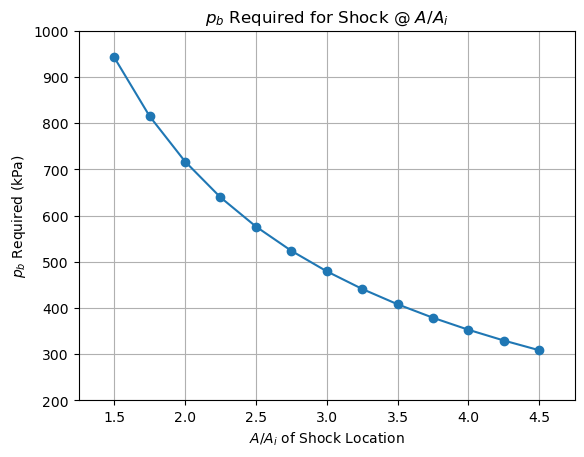

In [130]:
# plot the pb
plt.plot(ARs, pbs, "-o")
plt.grid()
plt.xlabel("$A/A_i$ of Shock Location")
plt.ylabel("$p_b$ Required (kPa)")
plt.title("$p_b$ Required for Shock @ $A/A_i$")
plt.ylim([200, 1000])
plt.xlim([1.25, 4.75])
plt.show()

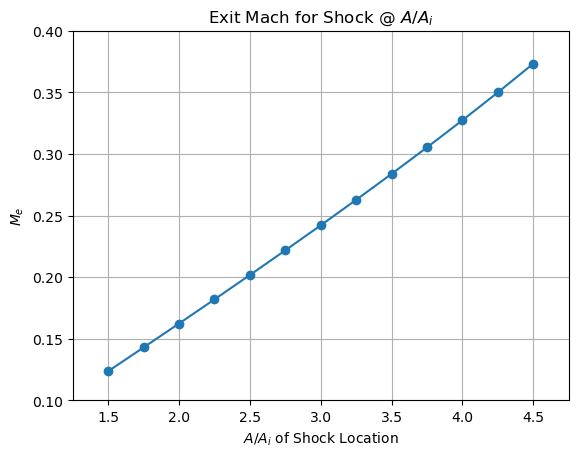

In [131]:
# plot the Mes
plt.plot(ARs, Mes, "-o")
plt.grid()
plt.xlabel("$A/A_i$ of Shock Location")
plt.ylabel("$M_e$")
plt.title("Exit Mach for Shock @ $A/A_i$")
plt.ylim([0.1, 0.4])
plt.xlim([1.25, 4.75])
plt.show()